# Homework 7: Stats and Modeling

## Larry Qu

## Step 2

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean: 5.08317651486639
Median: 2.0
Mode: 0    1
dtype: int64
Trimmed mean after removing bottom and top 10%: [2.44663846]


<AxesSubplot:ylabel='Frequency'>

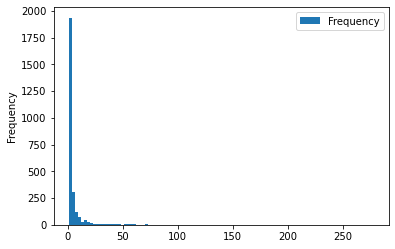

In [26]:
import requests
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem.lancaster import LancasterStemmer
from scipy import stats


#Shakespeare word frequency

#get the text for Romeo and Juliet
response = requests.get("http://shakespeare.mit.edu/romeo_juliet/full.html")
document = BeautifulSoup(response.text, "html.parser")
text = ""
for doc in document.find_all('blockquote'):
    text += (doc.text.strip())
    text += (" ")
#print(text)
    
#tokenize the words
sent = sent_tokenize(text)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
#print(len(words))
#print(words)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
#print(wordsNoStop)
#print(myStopWords)

wordStems = [LancasterStemmer().stem(w) for w in wordsNoStop]

freq = FreqDist(wordStems)
#for j in sorted(freq, key=freq.get, reverse=True)[:20]:
    #print(j,freq[j])
    
df = pd.DataFrame.from_dict(freq, orient='index')
df.columns = ['Frequency']
df.index.name = 'Term'
#print(df)
    
print("Mean: " + str(df['Frequency'].mean()))
print("Median: " + str(df['Frequency'].median()))
print("Mode: " + str(df['Frequency'].mode()))
print("Trimmed mean after removing bottom and top 10%: " + str(stats.trim_mean(df, 0.1))    )

df.plot(kind='hist',
        y='Frequency', bins=100, range=[df['Frequency'].min(), df['Frequency'].max()])

After removing the top and bottom 10% of the dataset for the trimmed mean, the mean is now 2.4. The untrimmed mean was 5.1. This means that there are many outliers that are very large.

The mean is on the far left side of the frequencies. The median is to the left of the mean. The mode is the farthest to the left. The trimmed mean is greater than the median but less than the untrimmed mean. 

In [32]:
print("Standard deviation: " + str(df['Frequency'].std()) )
print("Interquartile range: " + str(df['Frequency'].quantile(0.75)  - df['Frequency'].quantile(0.25) ) )

Standard deviation: 13.517511762277106
Interquartile range: 3.0


The interquartile range is less than the standard deviation. The standard deviation is higher, since the data is spread out a lot across the mean. However, the middle 50%, the interquartile range, is not very spread out. We can see all this in the histogram.

## Step 3: 